# Mohamed Abdelaaty

## Research question/interests

The primary interest is in the effect of elevation on the frequency and severity of car accidents.

The secondary interest is in the effect of time and weather conditions on the frequency and severity of car accidents.

In [1]:
# Import useful libraries
import sys
sys.path.append('../util')

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

## Data pipeline
from DataPipeline import DataPipeline as dp
from OpenElevationsWrapper import OpenElevationsApi as ElevationsApi

In [3]:
# Import raw dataset
DATASET_FILE_RELATIVE_PATH = "../data/processed/US_Accidents_Dec20_updated_processed_with_elevation.csv"

df = pd.read_csv(DATASET_FILE_RELATIVE_PATH)

In [4]:
## 1. Data exploration
# 1.1. Data overview
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Description,Weather_Timestamp,...,Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Elevation
0,A-2729981,2,2016-12-12 06:53:43,2016-12-12 12:53:43,44.96490,-93.24474,44.96586,-93.247260,At Cedar Ave/Exit 234 - Accident.,2016-12-12 06:53:00,...,WSW,9.2,0.00,Light Snow,False,Night,Night,Day,Day,256.0
1,A-2732319,2,2017-01-06 06:35:09,2017-01-06 12:35:09,30.43434,-91.17686,30.43021,-91.173570,At Washington St/Exit 155/Exit 156 - Accident.,2017-01-06 06:53:00,...,North,10.4,0.02,Overcast,False,Night,Night,Day,Day,20.0
2,A-2733450,2,2017-01-16 18:27:18,2017-01-17 00:27:18,44.76697,-93.03475,44.76489,-93.034530,At MN-55/Courthouse Blvd - Accident.,2017-01-16 18:29:00,...,NE,6.9,0.02,Overcast,False,Night,Night,Night,Day,283.0
3,A-2737423,2,2016-11-22 08:29:03,2016-11-22 14:29:03,44.86302,-93.24932,44.86228,-93.252530,Ramp to Cedar Ave - Accident.,2016-11-22 08:32:00,...,ESE,18.4,0.00,Light Rain,False,Day,Day,Day,Day,250.0
4,A-2749632,3,2016-12-01 16:23:26,2016-12-01 22:23:26,42.15386,-88.06286,42.15386,-88.062803,At CR-5/CR-V62/N Quentin Rd - Accident.,2016-12-01 16:52:00,...,West,5.8,0.00,Overcast,False,Night,Day,Day,Day,257.0


In [5]:
# 1.2. Columns
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Description', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Elevation'],
      dtype='object')

In [6]:
# 1.3. Data types
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Description               object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Sunrise_Sunset            object
Civil_Twilight            object
Nautical_Twilight         object
Astronomical_Twilight     object
Elevation                float64
dtype: object

In [7]:
# 1.4. Missing values
df.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Description              0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
Elevation                0
dtype: int64

In [8]:
# 1.5. Data description
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Elevation
count,166363.000000,166363.000000,166363.000000,166363.000000,166363.000000,166363.000000,166363.000000,166363.000000,166363.000000,166363.000000,166363.000000,166363.000000,166363.000000
mean,2.206963,37.907518,-100.613140,37.907458,-100.612723,61.419343,60.231628,61.268052,29.162968,9.179992,7.861998,0.004297,284.017907
std,0.700831,5.357386,18.899620,5.357143,18.899272,18.205895,20.215740,23.931686,1.292989,2.727079,5.692389,0.037805,411.446838
min,1.000000,24.574730,-124.497567,24.583640,-124.497478,-27.000000,-48.500000,1.000000,20.130000,0.000000,0.000000,0.000000,-20.000000
25%,2.000000,34.077366,-120.018409,34.077377,-120.018409,50.000000,49.000000,43.000000,29.020000,10.000000,4.600000,0.000000,38.000000
50%,2.000000,38.197315,-97.565530,38.197315,-97.565530,63.000000,63.000000,63.000000,29.630000,10.000000,7.000000,0.000000,136.000000
75%,2.000000,42.174674,-81.115175,42.173825,-81.112400,75.000000,75.000000,82.000000,29.920000,10.000000,12.000000,0.000000,306.000000
max,4.000000,48.993330,-67.484130,48.993330,-67.484130,111.000000,111.000000,100.000000,31.010000,100.000000,131.000000,9.970000,3506.000000


In [9]:
# 1.6. Data distribution
df.groupby('Weather_Condition').count()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Description,Weather_Timestamp,...,Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Elevation
Weather_Condition,,,,,,,,,,,,,,,,,,,,,
Blowing Dust,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
Blowing Dust / Windy,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Blowing Snow,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
Blowing Snow / Windy,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
Clear,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thunder / Windy,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
Thunder in the Vicinity,269,269,269,269,269,269,269,269,269,269,...,269,269,269,269,269,269,269,269,269,269
Widespread Dust,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


<AxesSubplot:xlabel='count', ylabel='Weather_Condition'>

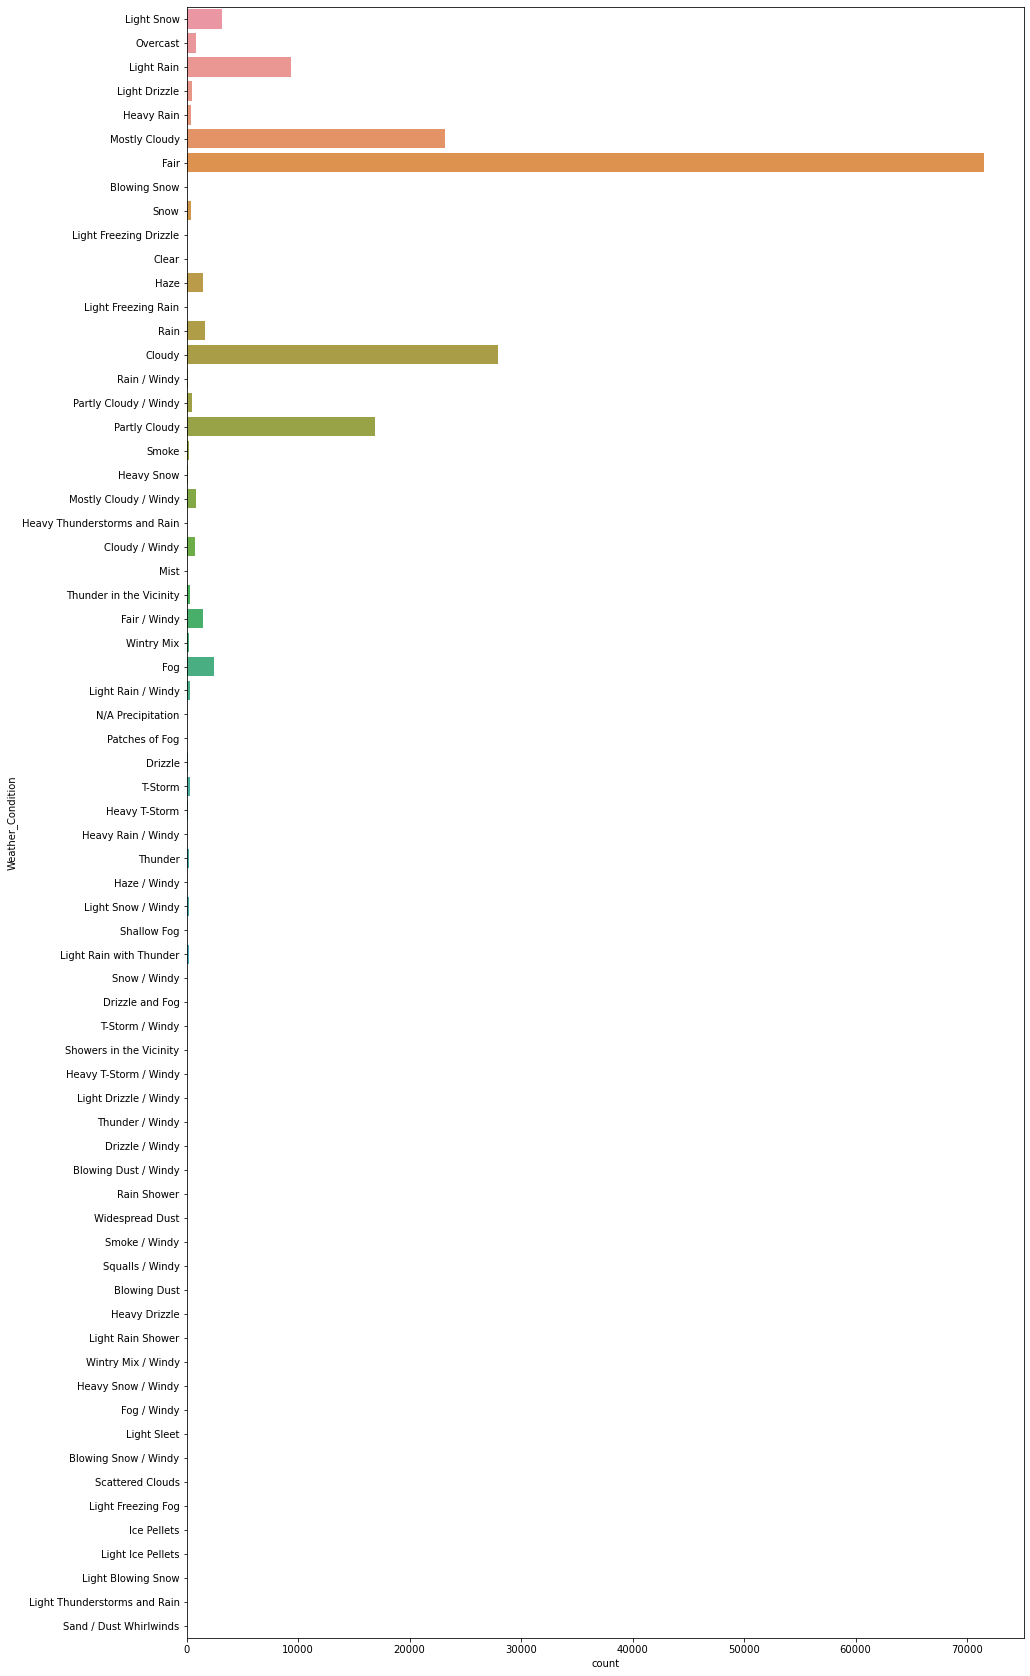

In [15]:
# 1.7. Data visualization

f, ax =plt.subplots(figsize=(15, 30))

sns.countplot(y='Weather_Condition', data=df)

array([[<AxesSubplot:title={'center':'Severity'}>,
        <AxesSubplot:title={'center':'Start_Lat'}>,
        <AxesSubplot:title={'center':'Start_Lng'}>,
        <AxesSubplot:title={'center':'End_Lat'}>],
       [<AxesSubplot:title={'center':'End_Lng'}>,
        <AxesSubplot:title={'center':'Distance(mi)'}>,
        <AxesSubplot:title={'center':'Number'}>,
        <AxesSubplot:title={'center':'Temperature(F)'}>],
       [<AxesSubplot:title={'center':'Wind_Chill(F)'}>,
        <AxesSubplot:title={'center':'Humidity(%)'}>,
        <AxesSubplot:title={'center':'Pressure(in)'}>,
        <AxesSubplot:title={'center':'Visibility(mi)'}>],
       [<AxesSubplot:title={'center':'Wind_Speed(mph)'}>,
        <AxesSubplot:title={'center':'Precipitation(in)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

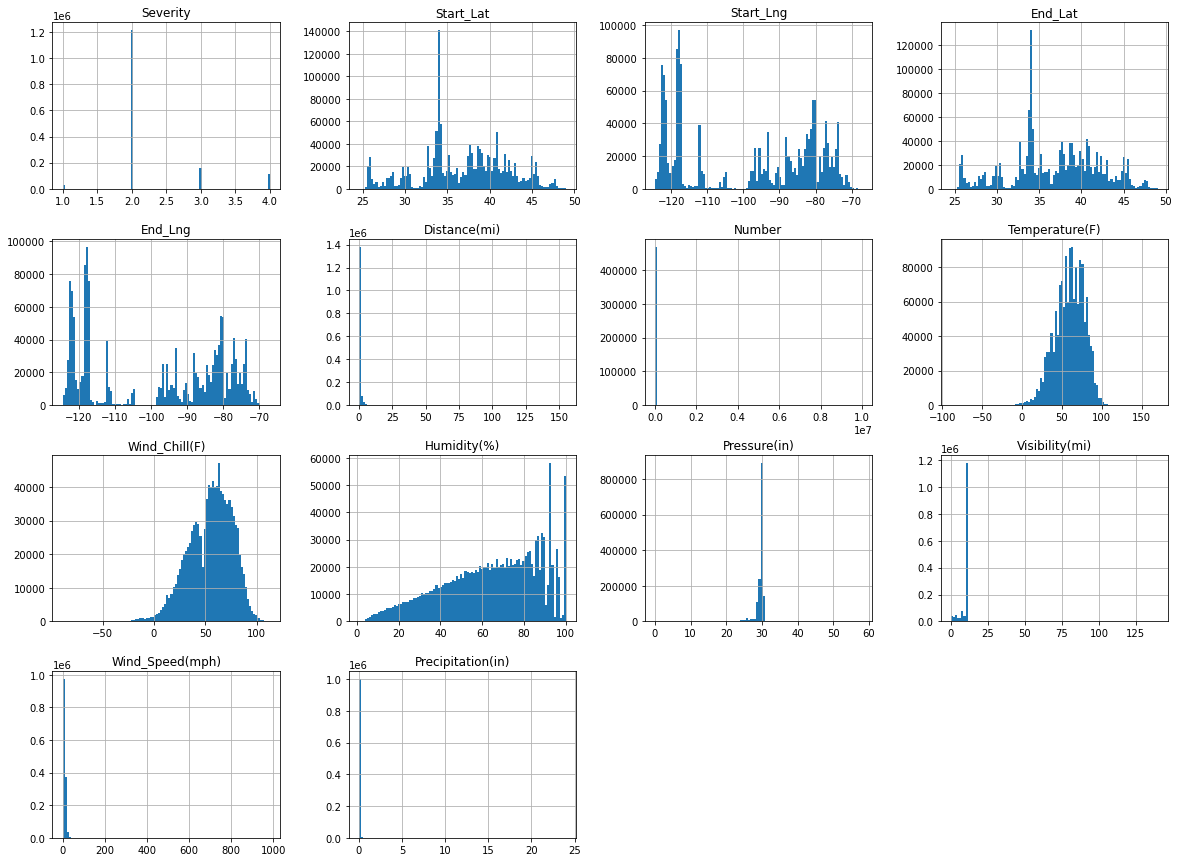

In [10]:
# 1.8. Histogram
df.hist(bins=100, figsize=(20,15))

In [11]:
# 1.9. Correlation
df.corr()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,1.000000,0.078723,0.179492,0.078729,0.179495,0.152869,-0.009666,-0.014952,-0.091947,0.047240,...,0.008090,0.021885,-0.001240,-0.004697,-0.000593,-0.012372,-0.000271,0.000864,-0.042802,NaN
Start_Lat,0.078723,1.000000,-0.099607,0.999995,-0.099602,0.041404,0.124377,-0.456720,-0.507982,0.044629,...,0.004707,-0.005741,-0.011859,0.005864,-0.006672,-0.054286,0.018116,0.000597,-0.070426,NaN
Start_Lng,0.179492,-0.099607,1.000000,-0.099591,0.999999,0.082412,-0.185956,-0.028814,-0.096016,0.199130,...,0.021456,-0.005603,0.005310,-0.014222,0.003033,0.023871,-0.040489,-0.002512,0.089101,NaN
End_Lat,0.078729,0.999995,-0.099591,1.000000,-0.099587,0.041459,0.124360,-0.456719,-0.507987,0.044626,...,0.004694,-0.005727,-0.011857,0.005866,-0.006672,-0.054285,0.018125,0.000594,-0.070425,NaN
End_Lng,0.179495,-0.099602,0.999999,-0.099587,1.000000,0.082393,-0.185949,-0.028812,-0.096013,0.199128,...,0.021453,-0.005602,0.005311,-0.014221,0.003033,0.023870,-0.040489,-0.002512,0.089099,NaN
Distance(mi),0.152869,0.041404,0.082412,0.041459,0.082393,1.000000,0.054719,-0.044103,-0.067638,0.039469,...,-0.001145,0.018292,-0.006599,-0.018523,-0.001811,-0.039244,-0.012171,-0.003731,-0.097484,NaN
Number,-0.009666,0.124377,-0.185956,0.124360,-0.185949,0.054719,1.000000,-0.054076,-0.048961,0.028274,...,-0.002873,-0.016275,-0.007412,-0.015040,-0.000783,-0.032563,0.001785,-0.003315,-0.083055,NaN
Temperature(F),-0.014952,-0.456720,-0.028814,-0.456719,-0.028812,-0.044103,-0.054076,1.000000,0.992669,-0.387202,...,-0.001557,0.021944,0.010706,0.003572,0.003291,0.039713,-0.008945,0.001135,0.082931,NaN
Wind_Chill(F),-0.091947,-0.507982,-0.096016,-0.507987,-0.096013,-0.067638,-0.048961,0.992669,1.000000,-0.369361,...,-0.004335,-0.016796,0.010603,0.008877,0.004697,0.054814,0.000539,0.003320,0.101893,NaN
Humidity(%),0.047240,0.044629,0.199130,0.044626,0.199128,0.039469,0.028274,-0.387202,-0.369361,1.000000,...,0.001489,0.002460,-0.009685,-0.000550,0.002772,-0.003585,-0.008570,-0.003021,-0.056239,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334821 entries, 44 to 1516029
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     334821 non-null  object 
 1   Severity               334821 non-null  int64  
 2   Start_Time             334821 non-null  object 
 3   End_Time               334821 non-null  object 
 4   Start_Lat              334821 non-null  float64
 5   Start_Lng              334821 non-null  float64
 6   End_Lat                334821 non-null  float64
 7   End_Lng                334821 non-null  float64
 8   Description            334821 non-null  object 
 9   Weather_Timestamp      334821 non-null  object 
 10  Temperature(F)         334821 non-null  float64
 11  Wind_Chill(F)          334821 non-null  float64
 12  Humidity(%)            334821 non-null  float64
 13  Pressure(in)           334821 non-null  float64
 14  Visibility(mi)         334821 non-

In [17]:
# 2.2. Data preprocessing
# 2.2.1. Data type conversion
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

## Retrieving Elevation Data

The following few cells contain the code necessary to retrieve the elevation data. Due to request rate limits, this process takes approximately 1.5 hours to complete. 

In order to obtain the elevation information, two sources appeared. The first source is a paid option, Google Elevations Api. This API is not available for free and charges based on the number of locations and requests. The other option is free, Open Elevations Api. This API provides the elevation data and operates in the same request pattern as the Google Elevations API. One downside is that it did not contain all the elevation data needed. However, it contained sufficent data for this project.

A custom wrapper was made for this API. Please see `util.OpenElevationsWrapper` for more information.

#### Attempted solutions

OpenElevations provides a self host option. I have attempted to self host the database and retrieve the data through it. However, the database construction scripts did not work successfully and the database had too much missing data to make this analysis feasible.




In [59]:
lat = df['Start_Lat'].to_numpy()
long = df['Start_Lng'].to_numpy()

lat_long = list()

for la, lo in zip(lat, long):
    lat_long.append({"latitude": la, "longitude": lo})


In [90]:
ElevationsApiOutput = list()

In [106]:
# Construct Elevations Mapping
OpenEA = ElevationsApi()

## 2000 lat/long pairs per requests worked with minimal errors. Any more and the server failes to return a response 
## as it runs out of memory...
start = 0
end = 2000

## Loop through the lat/long pairs in batches of 2000 and perform the request using the Elevations API Wrapper
for i in range( math.floor( len(lat_long)/2000) ):
    OpenEA.withMultipleLoc(lat_long[start:end])
    response = OpenEA.post()
    if (response.status_code == 200):
        ElevationsApiOutput.append(response.json()["results"])
    
    start += 2000
    end += 2000
    if end >= len(lat_long):
        break

#### Exporting the Elevation Data

The following couple of cells contain the code necessary to export the elevation data. The data is exported to a csv file.

In [112]:
import csv

keys = ElevationsApiOutput[0][0].keys()

dict_keys(['latitude', 'longitude', 'elevation'])

In [114]:
# Construct Elevations CSV File

with open('../data/processed/elevations.csv', 'a', newline='') as csvfile:
    for entries in ElevationsApiOutput:
        for entry in entries:
            writer = csv.DictWriter(csvfile, fieldnames=['latitude', 'longitude', 'elevation', 'error'])
            writer.writerow(entry)

#### Analysis Progression

The Analysis can progress from here as per normal by using the elevation data csv and inserting it into a CSV file.

In [121]:
df_elevations = pd.read_csv('../data/processed/elevations.csv')

C:\Users\mfare\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [147]:
## For some odd reason, Pandas fails to merge the datasets when the columns don't match. Despite selecting different 
## merge columns for the left and right dataframes, the resulting dataframe is always empty.
df_elevations.rename(columns={'Latitude': 'Start_Lat', 'Longitude': 'Start_Lng'}, inplace=True)

In [161]:
df_mixed = pd.merge(df, df_elevations, how="left", on=['Start_Lat', 'Start_Lng'])

In [169]:
df_mixed.dropna(inplace=True)

In [177]:
df_mixed.drop_duplicates(inplace=True)

In [179]:
df_elevations.count()

Start_Lat    163897
Start_Lng    163897
Elevation    163897
dtype: int64

In [139]:
df.dtypes

ID                               object
Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Description                      object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                   object
Wind_Speed(mph)                 float64
Precipitation(in)               float64
Weather_Condition                object
Amenity                            bool
Sunrise_Sunset                   object
Civil_Twilight                   object
Nautical_Twilight                object
Astronomical_Twilight            object
dtype: object

In [135]:
## Get rid of the Error column generated from the Open Elevations API Request.
df_elevations.drop(columns=['Error'], inplace=True)

In [136]:
df_elevations.dropna(inplace=True)

In [137]:
df_elevations.count()

Latitude     163897
Longitude    163897
Elevation    163897
dtype: int64

In [182]:
df_mixed.to_csv('../data/processed/US_Accidents_Dec20_updated_processed_with_elevation.csv', index=False)

## Working with the Dataset after a reset notebook kernel

From this point on, working with the dataset is extremely simple as the data is already in a csv file. The data can then be retrieved into a new dataframe and any further analysis can be performed as necessary

In [5]:
df = pd.read_csv('../data/processed/US_Accidents_Dec20_updated_processed_with_elevation.csv')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,166363.0,2.206963,0.700831,1.000000,2.000000,2.000000,2.000000,4.00000
Start_Lat,166363.0,37.907518,5.357386,24.574730,34.077366,38.197315,42.174674,48.99333
Start_Lng,166363.0,-100.613140,18.899620,-124.497567,-120.018409,-97.565530,-81.115175,-67.48413
End_Lat,166363.0,37.907458,5.357143,24.583640,34.077377,38.197315,42.173825,48.99333
End_Lng,166363.0,-100.612723,18.899272,-124.497478,-120.018409,-97.565530,-81.112400,-67.48413
Temperature(F),166363.0,61.419343,18.205895,-27.000000,50.000000,63.000000,75.000000,111.00000
Wind_Chill(F),166363.0,60.231628,20.215740,-48.500000,49.000000,63.000000,75.000000,111.00000
Humidity(%),166363.0,61.268052,23.931686,1.000000,43.000000,63.000000,82.000000,100.00000
Pressure(in),166363.0,29.162968,1.292989,20.130000,29.020000,29.630000,29.920000,31.01000
Visibility(mi),166363.0,9.179992,2.727079,0.000000,10.000000,10.000000,10.000000,100.00000
